## [Drawing Molecules (Jupyter)](https://www.rdkit.org/docs/Cookbook.html#drawing-molecules-jupyter)

### [Include an Atom Index](https://www.rdkit.org/docs/Cookbook.html#include-an-atom-index)

In [82]:
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
IPythonConsole.ipython_useSVG=True  #< set this to False if you want PNGs instead of SVGs

In [83]:
def mol_with_atom_index(mol):
    for atom in mol.GetAtoms():
        atom.SetAtomMapNum(atom.GetIdx())
    return mol

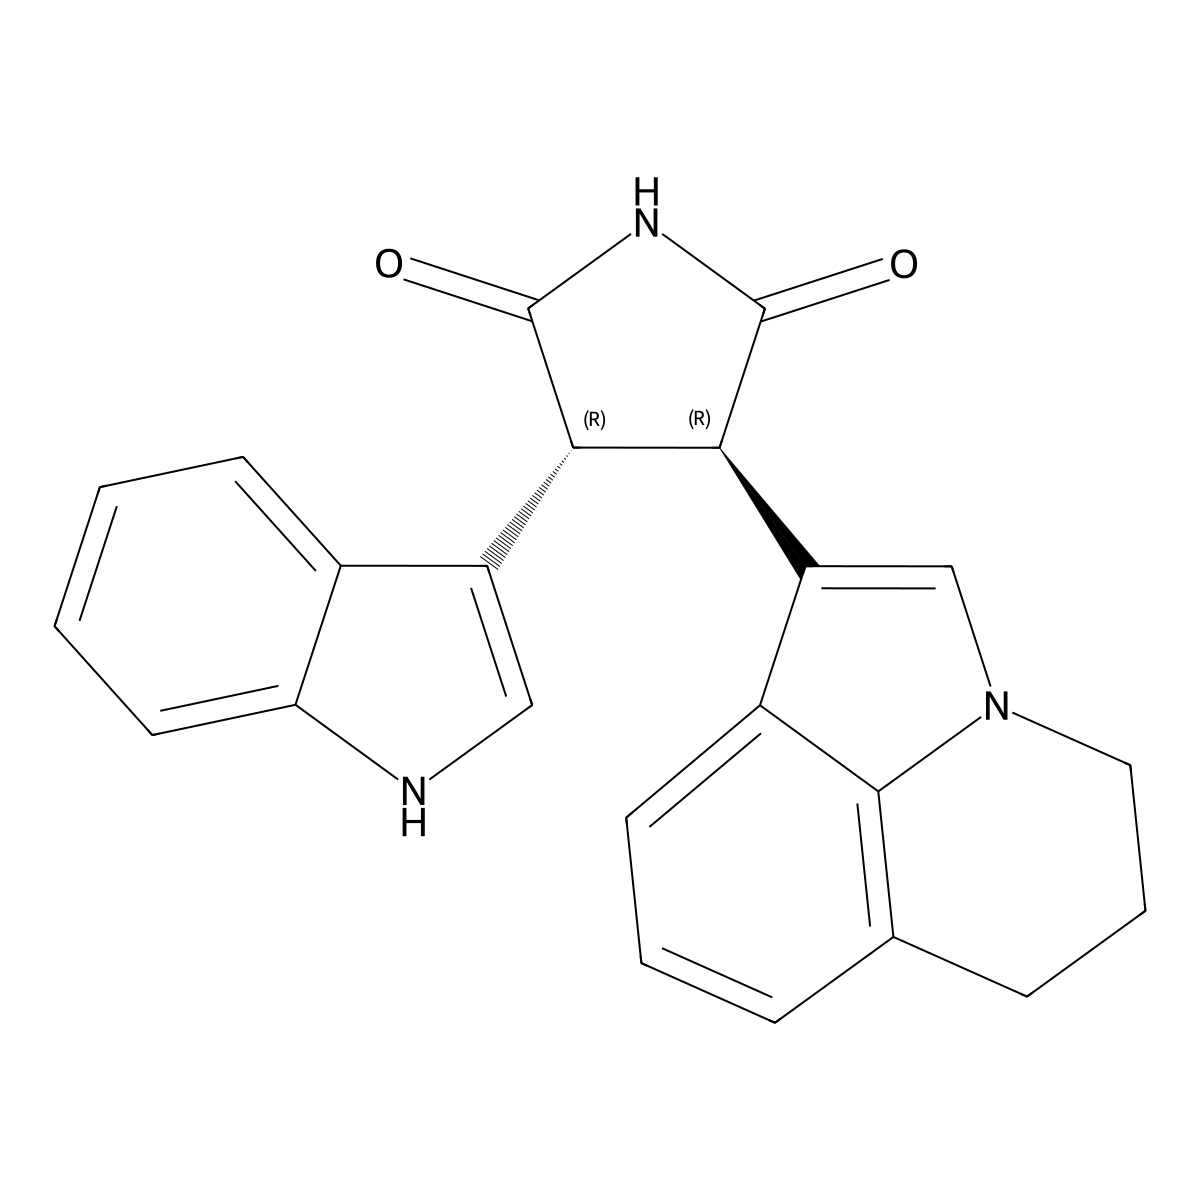

In [84]:
# Test in a kinase inhibitor
mol = Chem.MolFromSmiles("C1CC2=C3C(=CC=C2)C(=CN3C1)[C@H]4[C@@H](C(=O)NC4=O)C5=CNC6=CC=CC=C65")
# Default
mol

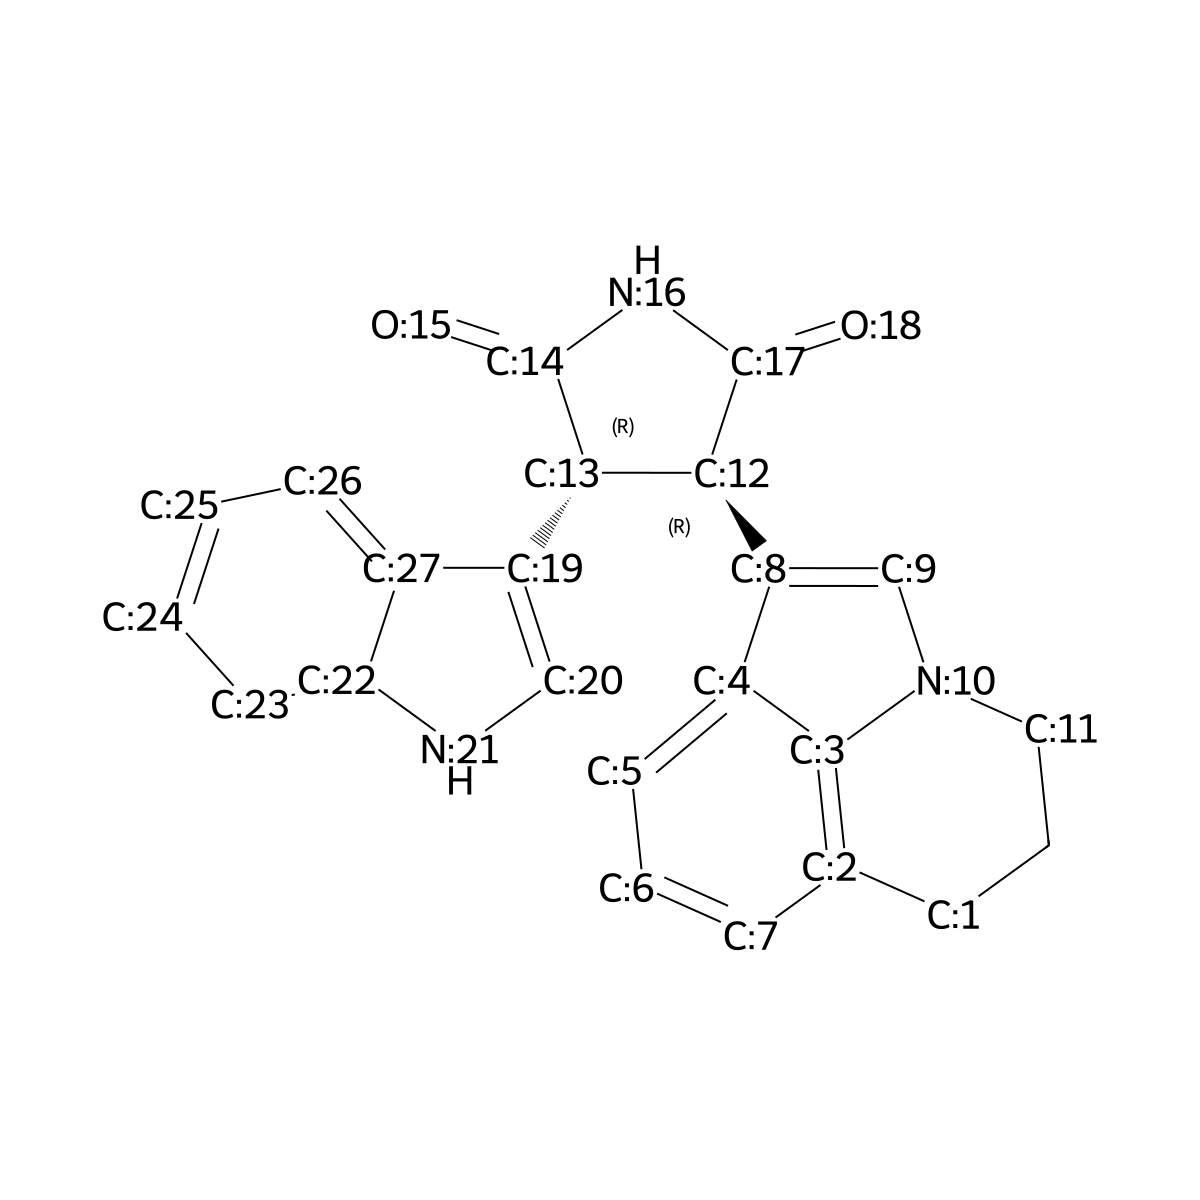

In [85]:
# With atom index
mol_with_atom_index(mol)

In [86]:
# from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
IPythonConsole.drawOptions.addAtomIndices = True
IPythonConsole.molSize = 300,300

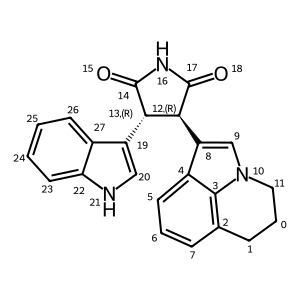

In [87]:
mol = Chem.MolFromSmiles("C1CC2=C3C(=CC=C2)C(=CN3C1)[C@H]4[C@@H](C(=O)NC4=O)C5=CNC6=CC=CC=C65")
mol

In [88]:
IPythonConsole.drawOptions.addAtomIndices = False

### [Include a Calculation](https://www.rdkit.org/docs/Cookbook.html#include-a-calculation)

In [89]:
# from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.molSize = 250,250

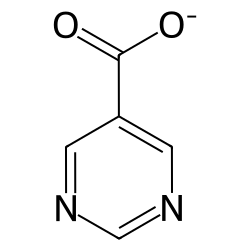

In [90]:
m = Chem.MolFromSmiles('c1ncncc1C(=O)[O-]')
AllChem.ComputeGasteigerCharges(m)
m

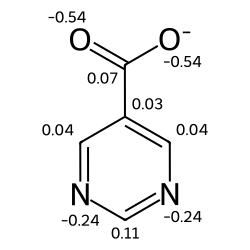

In [91]:
m2 = Chem.Mol(m)
for at in m2.GetAtoms():
    lbl = '%.2f'%(at.GetDoubleProp("_GasteigerCharge"))
    at.SetProp('atomNote', lbl)
m2

### [Include Stereo Annotations](https://www.rdkit.org/docs/Cookbook.html#include-stereo-annotations)

In [92]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.drawOptions.addAtomIndices = False
IPythonConsole.drawOptions.addStereoAnnotation = True

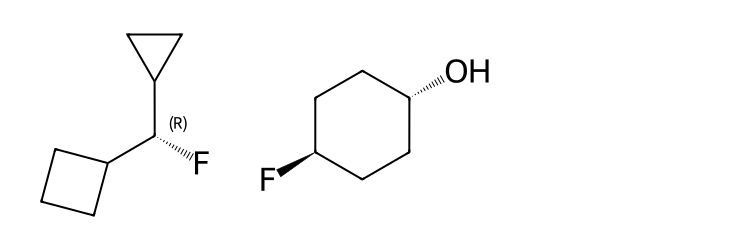

In [93]:
# Default Representation uses legacy FindMolChiralCenters() code
m1 = Chem.MolFromSmiles('C1CC1[C@H](F)C1CCC1')
m2 = Chem.MolFromSmiles('F[C@H]1CC[C@H](O)CC1')
Draw.MolsToGridImage((m1,m2), subImgSize=(250,250))

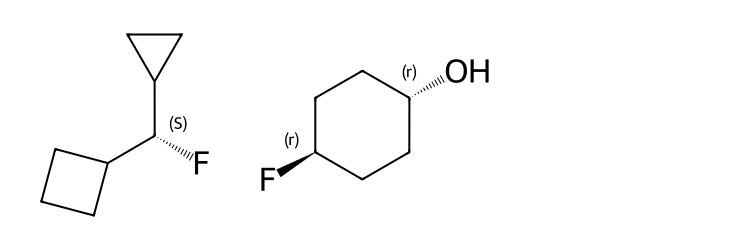

In [94]:
# new stereochemistry code with more accurate CIP labels, 2020.09 release
from rdkit.Chem import rdCIPLabeler
rdCIPLabeler.AssignCIPLabels(m1)
rdCIPLabeler.AssignCIPLabels(m2)
Draw.MolsToGridImage((m1,m2), subImgSize=(250,250))

### [Black and White Molecules](https://www.rdkit.org/docs/Cookbook.html#black-and-white-molecules)

In [95]:
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw

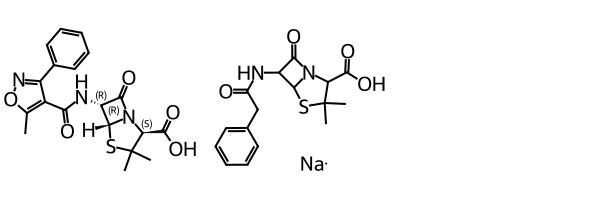

In [96]:
ms = [Chem.MolFromSmiles(x) for x in ('Cc1onc(-c2ccccc2)c1C(=O)N[C@@H]1C(=O)N2[C@@H](C(=O)O)C(C)(C)S[C@H]12','CC1(C)SC2C(NC(=O)Cc3ccccc3)C(=O)N2C1C(=O)O.[Na]')]
Draw.MolsToGridImage(ms)

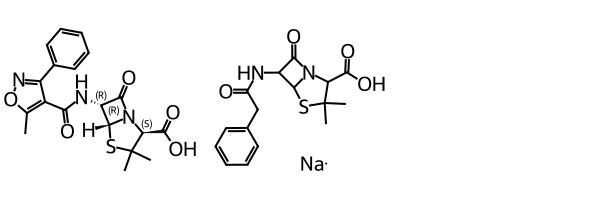

In [97]:
IPythonConsole.drawOptions.useBWAtomPalette()
Draw.MolsToGridImage(ms)

### [Highlight a Substructure in a Molecule](https://www.rdkit.org/docs/Cookbook.html#highlight-a-substructure-in-a-molecule)

In [98]:
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole

In [99]:
m = Chem.MolFromSmiles('c1cc(C(=O)O)c(OC(=O)C)cc1')
substructure = Chem.MolFromSmarts('C(=O)O')
print(m.GetSubstructMatches(substructure))

((3, 4, 5), (8, 9, 7))


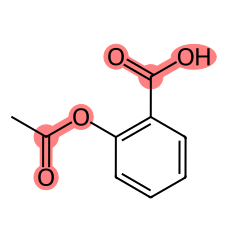

In [100]:
m

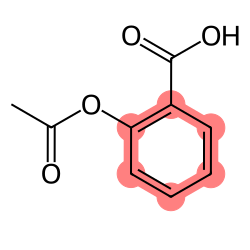

In [101]:
substructure2 = Chem.MolFromSmarts('cc')
m.GetSubstructMatches(substructure2)
m

Note that doing another .GetSubstructMatches() on a molecule removes the first one (highlighting matches)

### [Highlight Molecule Differences](https://www.rdkit.org/docs/Cookbook.html#highlight-molecule-differences)

In [102]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import rdFMCS
from rdkit.Chem.Draw import rdDepictor
rdDepictor.SetPreferCoordGen(True)
IPythonConsole.drawOptions.minFontSize=20

In [103]:
mol1 = Chem.MolFromSmiles('FC1=CC=C2C(=C1)C=NN2')
mol2 = Chem.MolFromSmiles('CCC1=C2NN=CC2=CC(Cl)=C1')

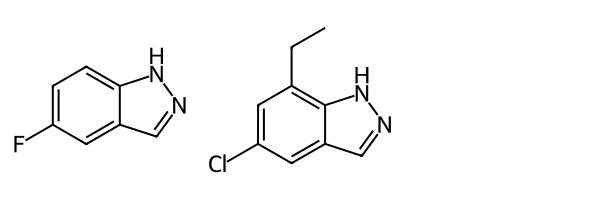

In [104]:
Draw.MolsToGridImage([mol1, mol2])

In [105]:
def view_difference(mol1, mol2):
    mcs = rdFMCS.FindMCS([mol1, mol2])
    mcs_mol = Chem.MolFromSmarts(mcs.smartsString)
    match1 = mol1.GetSubstructMatch(mcs_mol)
    target_atm1 = []
    for atom in mol1.GetAtoms():
        if atom.GetIdx() not in match1:
            target_atm1.append(atom.GetIdx())
    match2 = mol2.GetSubstructMatch(mcs_mol)
    target_atm2 = []
    for atom in mol2.GetAtoms():
        if atom.GetIdx() not in match2:
            target_atm2.append(atom.GetIdx())
    print(f"{target_atm2=}")
    return Draw.MolsToGridImage([mol1, mol2], highlightAtomLists=[target_atm1, target_atm2])

target_atm2=[0, 1, 10]


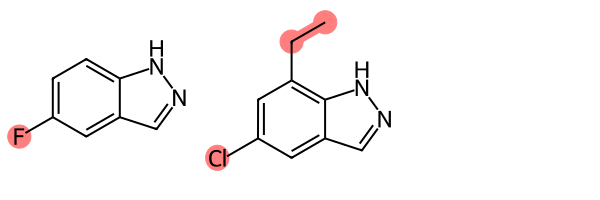

In [106]:
view_difference(mol1, mol2)

## [Without Implicit Hydrogens](http://rdkit.org/docs/Cookbook.html#without-implicit-hydrogens)

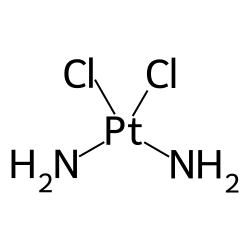

In [107]:
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
m = Chem.MolFromSmiles('[Pt](Cl)(Cl)(N)N')
m

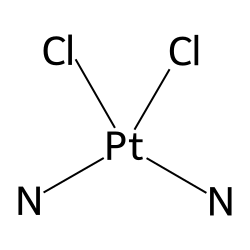

In [108]:
for atom in m.GetAtoms():
    atom.SetProp("atomLabel", atom.GetSymbol())
m

## [With Abbreviations](http://rdkit.org/docs/Cookbook.html#with-abbreviations)

In [109]:
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
from rdkit.Chem import rdAbbreviations

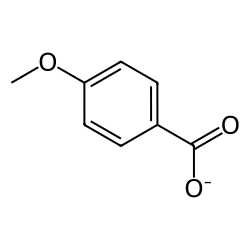

In [110]:
m = Chem.MolFromSmiles('COc1ccc(C(=O)[O-])cc1')
m

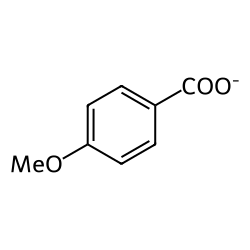

In [111]:
abbrevs = rdAbbreviations.GetDefaultAbbreviations()
nm = rdAbbreviations.CondenseMolAbbreviations(m, abbrevs)
nm

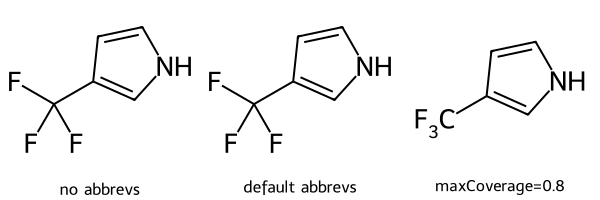

In [112]:
# Abbreviations that cover more than 40% of the molecule won't be applied by default
m = Chem.MolFromSmiles('c1c[nH]cc1C(F)(F)(F)')
nm1 = rdAbbreviations.CondenseMolAbbreviations(m, abbrevs)
nm2 = rdAbbreviations.CondenseMolAbbreviations(m, abbrevs, maxCoverage=0.8)
Draw.MolsToGridImage((m, nm1, nm2), legends=('no abbrevs', 'default abbrevs', 'maxCoverage=0.8'))

List of built-in abbreviations:

In [113]:
abbrevs = rdAbbreviations.GetDefaultAbbreviations()
labels = ["Abbrev", "SMILES"]
line = '--------'

print(f"{labels[0]:<10} {labels[1]}")
print(f"{line:<10} {line}")
for a in abbrevs:
    print(f"{a.label:<10} {Chem.MolToSmiles(a.mol)}")

Abbrev     SMILES
--------   --------
CO2Et      *C(=O)OCC
COOEt      *C(=O)OCC
OiBu       *OCC(C)C
nDec       *CCCCCCCCCC
nNon       *CCCCCCCCC
nOct       *CCCCCCCC
nHept      *CCCCCCC
nHex       *CCCCCC
nPent      *CCCCC
iPent      *C(C)CCC
tBu        *C(C)(C)C
iBu        *C(C)CC
nBu        *CCCC
iPr        *C(C)C
nPr        *CCC
Et         *CC
NCF3       *NC(F)(F)F
CF3        *C(F)(F)F
CCl3       *C(Cl)(Cl)Cl
CN         *C#N
NC         *[N+]#[C-]
N(OH)CH3   *N(C)[OH]
NO2        *[N+](=O)[O-]
NO         *N=O
SO3H       *S(=O)(=O)[OH]
CO2H       *C(=O)[OH]
COOH       *C(=O)[OH]
OEt        *OCC
OAc        *OC(C)=O
NHAc       *NC(C)=O
Ac         *C(C)=O
CHO        *C=O
NMe        *NC
SMe        *SC
OMe        *OC
CO2-       *C(=O)[O-]
COO-       *C(=O)[O-]


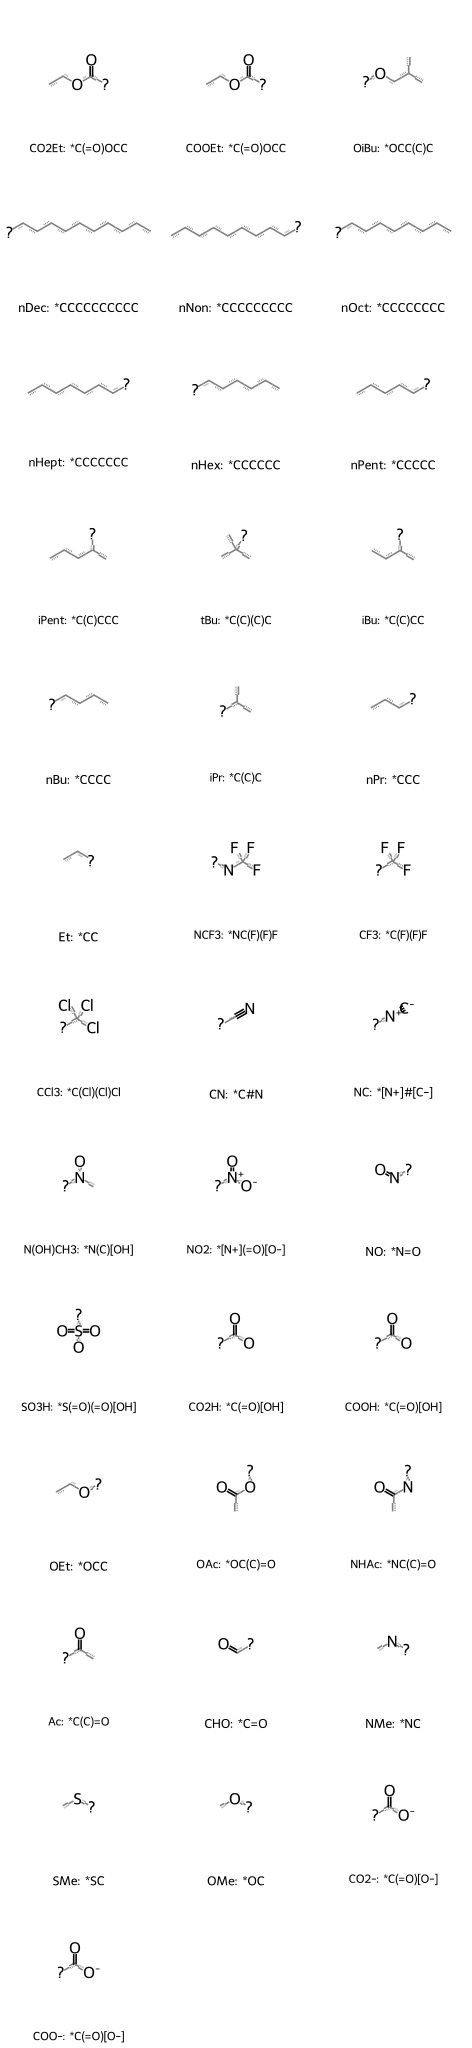

In [114]:
abbrevs_mols = [a.mol for a in abbrevs]
abbrevs_labels = [a.label for a in abbrevs]
abbrevs_smiles = [Chem.MolToSmiles(mol) for mol in abbrevs_mols]
legends = [label + ": " + smile for label, smile in zip(abbrevs_labels, abbrevs_smiles)]
Draw.MolsToGridImage(abbrevs_mols, legends=legends)

## [Using CoordGen Library](https://www.rdkit.org/docs/Cookbook.html#using-coordgen-library) to draw macrocycles well

In [115]:
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.molSize = 350, 300
from rdkit.Chem import Draw

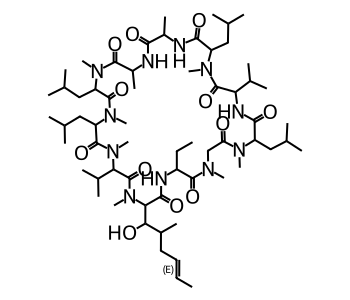

In [116]:
# default drawing
macro = Chem.MolFromSmiles("C/C=C/CC(C)C(O)C1C(=O)NC(CC)C(=O)N(C)CC(=O)N(C)C(CC(C)C)C(=O)NC(C(C)C)C(=O)N(C)C(CC(C)C)C(=O)NC(C)C(=O)NC(C)C(=O)N(C)C(CC(C)C)C(=O)N(C)C(CC(C)C)C(=O)N(C)C(C(C)C)C(=O)N1C")
macro

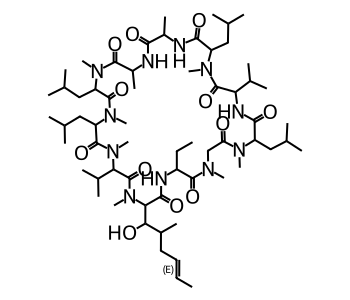

In [117]:
# with CoordGen
from rdkit.Chem import rdCoordGen
rdCoordGen.AddCoords(macro)
# for atom in macro.GetAtoms():
#     atom.SetProp("molAtomMapNumber", str(atom.GetIdx()))
macro

## [On a Plot](https://www.rdkit.org/docs/Cookbook.html#on-a-plot) (showing a molecule on a plot)

In [118]:
import matplotlib.pyplot as plt
import numpy as np

In [119]:
x = np.arange(0,180,1)
y = np.sin(x)

In [121]:
mol = Chem.MolFromSmiles('C1CNCCC1C(=O)C')
im = Chem.Draw.MolToImage(mol)

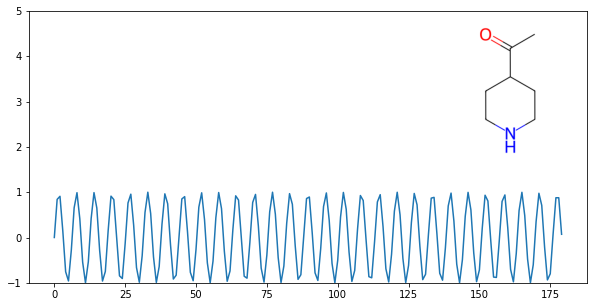

In [124]:
fig = plt.figure(figsize=(10,5))
plt.plot(x, y)
plt.ylim(-1, 5)
ax = plt.axes([0.6, 0.47, 0.38, 0.38], frameon=True)
ax.imshow(im)
ax.axis('off')
plt.show()